In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [11]:
with open('get_movies.pkl', 'rb') as f:
    t = pickle.load(f)
    
movie_dic = t[0]
movie_genre_dic = t[1]

with open('get_ratings.pkl', 'rb') as f:
    lst = pickle.load(f)

In [48]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = len(Y)
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))


In [49]:
num_movies = len(movie_dic)
num_users = 943

In [50]:
m = num_users
n = num_movies
k = 20
eta = 0.1
reg = 0.01

In [51]:
ratings = np.array(lst)

In [55]:
u,v, final_err = train_model(m, n, k, eta, reg, lst, eps=0.0001, max_epochs=300)

Epoch 1, E_in (regularized MSE): 1.2731930034035666
Epoch 2, E_in (regularized MSE): 0.7377106956579883
Epoch 3, E_in (regularized MSE): 0.6123866359047299
Epoch 4, E_in (regularized MSE): 0.5934457499552637
Epoch 5, E_in (regularized MSE): 0.5723139727202893
Epoch 6, E_in (regularized MSE): 0.5447347938781923
Epoch 7, E_in (regularized MSE): 0.5358121770869843
Epoch 8, E_in (regularized MSE): 0.5209852495851561
Epoch 9, E_in (regularized MSE): 0.4880476135070187
Epoch 10, E_in (regularized MSE): 0.49705701917370293


# train/test

In [67]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

In [79]:
num_movies = len(movie_dic)
num_users = 943
m = num_users
n = num_movies
k = 20
eta = 0.1
reg = 0.1

u,v, final_err = train_model(m, n, k, eta, reg, Y_train, eps=0.0001, max_epochs=300)


Epoch 1, E_in (regularized MSE): 0.5514203164257055
Epoch 2, E_in (regularized MSE): 0.4904071257925752
Epoch 3, E_in (regularized MSE): 0.476288317702111
Epoch 4, E_in (regularized MSE): 0.45897366580190013
Epoch 5, E_in (regularized MSE): 0.44438178438173564
Epoch 6, E_in (regularized MSE): 0.44306436965628115
Epoch 7, E_in (regularized MSE): 0.4367816832290115
Epoch 8, E_in (regularized MSE): 0.430810459098741
Epoch 9, E_in (regularized MSE): 0.40315592647561665
Epoch 10, E_in (regularized MSE): 0.42683975664164664


In [81]:
e_in = get_err(u, v, Y_train)
e_out = get_err(u, v, Y_test)
print("e_in is: " + str(e_in))
print("e_out is: " + str(e_out))

e_in is: 0.4203393003149005
e_out is: 0.5443288525514133


# SVD visualization

In [86]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit_transform(v)
print("done")

done


In [92]:
from numpy.linalg import svd
a, sigma, b = np.linalg.svd(v)

In [93]:
a.shape

(20, 20)

In [94]:
b.shape

(1682, 1682)

In [100]:
np.diag(sigma).shape

(20, 20)

In [102]:
u.shape

(943, 20)

In [103]:
v.shape

(20, 1682)

In [118]:
transformer = a[:, :2].T
print(transformer.shape)

(2, 20)


In [117]:
transformed_v = np.matmul(transformer, v).T
print(transformed_v.shape)

(1682, 2)


In [119]:
transformed_u = np.matmul(transformer, u.T).T
print(transformed_u.shape)

(943, 2)


# visualizations

In [124]:
indices = np.random.randint(1682, size=10)

In [125]:
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]

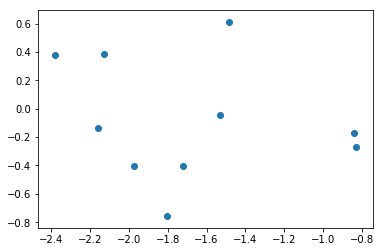

In [127]:
plt.scatter(x,y)

In [146]:
num_ratings_vs_movies = [0 for i in movie_dic.keys()]
for (i, j, yij) in lst:
    num_ratings_vs_movies[j] += 1
num_ratings_vs_movies = np.array(num_ratings_vs_movies)

In [147]:
indices = num_ratings_vs_movies.argsort()[-10:][::-1]

array([ 49, 257,  99, 180, 293, 285, 287,   0, 299, 120])

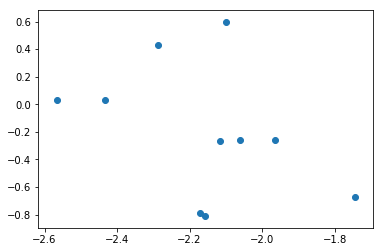

In [148]:
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

In [153]:
movie_rating_dic = {id: [] for id in movie_dic.keys()} # dic of movie id and ratings

for rating in lst:
    _, movie_id, r = rating
    movie_rating_dic[movie_id].append(r)

avg_ratings = {movie: sum(movie_rating_dic[movie]) / len(movie_rating_dic[movie]) \
               for movie in movie_rating_dic}

# get ten best movies that received highest average rating
top_10 = sorted(avg_ratings.items(), key=lambda tup: tup[1], reverse=True)[:10]
indices = [t[0] for t in top_10]

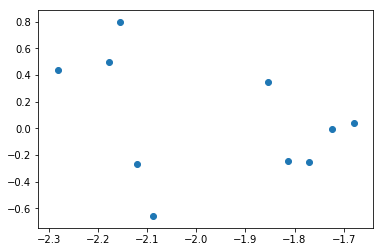

In [154]:
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

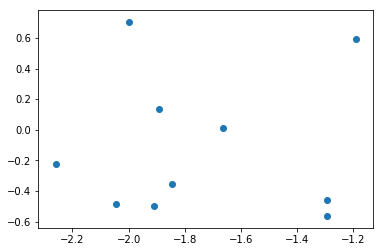

In [157]:
fant_movies = movie_genre_dic['Fantasy']
indices = fant_movies[:10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

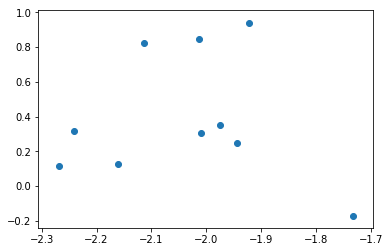

In [158]:
fant_movies = movie_genre_dic['Documentary']
indices = fant_movies[:10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

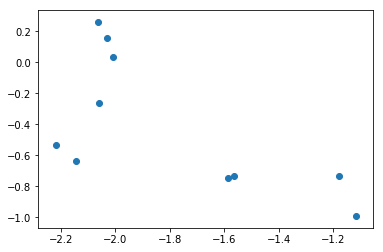

In [159]:
fant_movies = movie_genre_dic["Children's"]
indices = fant_movies[:10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)